In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [2]:
data = pd.read_csv('../data_sets/oasis_longitudinal.csv')
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Laten we eerst een kijke hoe veel data we missen en een gevoel krijgen voor de data

In [3]:
data.info()
#ID kijken.
#M/F naar int to zetten.
#hand kijken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
for x in data.columns:
    print(data[x].unique().__len__(),x)
# hier zien we dat hand maar 1 warden heeft dus die kan weg.
# Veder zien we dat MRI ID ook weg kan om dat het overal anders is.
# Subject ID hebben we ook niet echt noding om dat het niks te maken heeft met wat we willen onderzoeken

150 Subject ID
373 MRI ID
3 Group
5 Visit
201 MR Delay
2 M/F
1 Hand
39 Age
12 EDUC
6 SES
19 MMSE
4 CDR
286 eTIV
136 nWBV
265 ASF


In [5]:
data = data.drop(columns=['Hand','Subject ID','MRI ID'])

In [6]:
data['M/F'] = data['M/F'].replace(['F','M'],[0,1])
data['Group'] = data['Group'].replace(['Converted','Demented','Nondemented'],[1,1,0])
data


,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [7]:
data['MMSE']=data['MMSE'].fillna(value=data['MMSE'].median())
data.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         0
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [8]:
data['SES'] = data['SES'].fillna(value=data['SES'].median())
data.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

The accuracy of the KNN is 0.8 <br/>

kijken of we een nn kunnen maken die dit beter kan.

In [9]:
feature_X = data[['M/F','MMSE','EDUC']]
target_y = data['Group']
train_X, test_X, train_y, test_y = train_test_split(feature_X, target_y, test_size = 0.20, random_state = 42)
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(298, 3) (298,)
(75, 3) (75,)


In [10]:
# De waarden in X_train zijn erg verschillend, een neuraal netwerk verwacht waarden rond 0
val_X = train_X.values
min_max_scaler = MinMaxScaler()
nn_train_X = min_max_scaler.fit_transform(val_X)

# Keras verwacht een matrix (array van array's) als output:
nn_train_y = train_y.values.reshape(-1,1)
nn_test_y = test_y.values.reshape(-1,1)

encoder = OneHotEncoder(sparse=False)
nn_train_y = encoder.fit_transform(nn_train_y)
nn_test_y = encoder.transform(nn_test_y)

print(train_y[:10])

nn_test_X = test_X.values
nn_test_X = min_max_scaler.fit_transform(nn_test_X)

# Om te zorgen dat we de sigmoid activatie kunnen gebruiken moeten we de data reschapen
nn_train_y = np.asarray(train_y).astype('float32').reshape((-1,1))
nn_test_y = np.asarray(test_y).astype('float32').reshape((-1,1))

x_val_set = train_X[:60]
y_val_set = train_y[:60]

192    0
75     1
84     0
361    0
16     1
66     0
283    1
7      0
113    0
116    0
Name: Group, dtype: int64


In [11]:
# simple nn
nn_model = Sequential()
nn_model.add(Dense(30, activation = "relu", input_shape = (nn_train_X.shape[1], )))
nn_model.add(Dense(20, activation = "relu"))
nn_model.add(Dense(10, activation = "relu"))
nn_model.add(Dense(1, activation = "sigmoid"))

In [12]:
nn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
nn_model.summary()
history = nn_model.fit(nn_train_X, nn_train_y,
                       epochs = 20,
                       batch_size = 32,
                       validation_data = (x_val_set, y_val_set))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - 0s 30ms/step - loss: 0.6847 - accuracy: 0.5302 - val_loss: 1.7949 - val_accuracy: 0.5667

In [13]:
nn_loss, nn_acc = nn_model.evaluate(nn_test_X, nn_test_y)
print(nn_acc)

3/3 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5600
0.5600000023841858


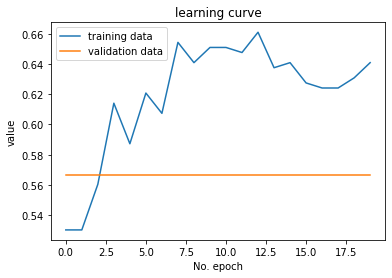

In [14]:
# Plot history
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('learning curve')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [15]:
nn_model = Sequential()
nn_model.add(Dense(64, activation = "relu", input_shape = (nn_train_X.shape[1], )))
nn_model.add(Dropout(0.5, noise_shape=None, seed=None))
nn_model.add(Dense(64, activation = "relu"))
nn_model.add(Dropout(0.5, noise_shape=None, seed=None))
nn_model.add(Dense(32, activation = "relu"))
nn_model.add(Dropout(0.5, noise_shape=None, seed=None))
nn_model.add(Dense(32, activation = "relu"))
nn_model.add(Dense(1, activation = "sigmoid"))

In [16]:
nn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
nn_model.summary()
history = nn_model.fit(nn_train_X, nn_train_y,
                       epochs = 20,
                       batch_size = 32,
                       validation_data = (x_val_set, y_val_set))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [17]:
nn_loss, nn_acc = nn_model.evaluate(nn_test_X, nn_test_y)
print(nn_acc)

3/3 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5600
0.5600000023841858


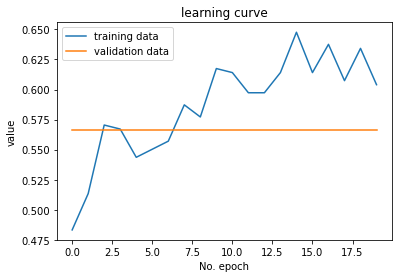

In [18]:
# Plot history
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('learning curve')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

we hebben niet bezonder veel data dus ook niet veel opsies maar ok zeker weer last van overfiting
